# LABORATORIO No. 2

**Catedrático:** Ing. Preng Biba Solares  

**Auxiliar:** Ing. Jorge Alberto Osoy Barrera

**Alumno:** Jordi Gian Carlo Chajón López (Carnet 23000477) 

# Problema #1:

### Importación de librerías

In [73]:
import cv2
import matplotlib.pyplot as plt


### Función que binariza la imagen

In [74]:
def binarizar_imagen(imagen_path, umbral=128):
    imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)
    _, imagen_binarizada = cv2.threshold(imagen, umbral, 255, cv2.THRESH_BINARY)
    
    return imagen_binarizada

### Carga de imagen y aplicación de función

In [75]:
imagen_binarizada = binarizar_imagen('Paisaje.jpg', umbral=128)

### Se muestra la imagen

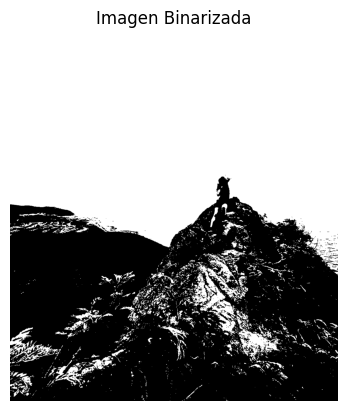

In [76]:
plt.imshow(imagen_binarizada, cmap='gray')
plt.title('Imagen Binarizada')
plt.axis('off') 
plt.show()

# Problema #2:

### Función para realizar las operaciones entre imágenes.

In [77]:
def procesar_imagenes(imagen1_path, imagen2_path, umbral=128):

    img1 = cv2.imread(imagen1_path)
    img2 = cv2.imread(imagen2_path) 
  
    gris1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gris2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    _, binarizada1 = cv2.threshold(gris1, umbral, 255, cv2.THRESH_BINARY)
    _, binarizada2 = cv2.threshold(gris2, umbral, 255, cv2.THRESH_BINARY)
    
    suma = cv2.add(binarizada1, binarizada2)
    resta = cv2.subtract(binarizada1, binarizada2)
    and_op = cv2.bitwise_and(binarizada1, binarizada2)
    or_op = cv2.bitwise_or(binarizada1, binarizada2)
    xor_op = cv2.bitwise_xor(binarizada1, binarizada2)
    
    return suma, resta, and_op, or_op, xor_op

### Carga de imágenes y aplicación de función

In [78]:
suma, resta, and_op, or_op, xor_op = procesar_imagenes('Palmeras.jpg','Peten.jpg', umbral=128)

### Función para mostrar todas la imágenes

In [79]:
def mostrar_imagenes(imagenes, titulos):
    plt.figure(figsize=(12, 8))
    for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
    plt.show()

### Resultado

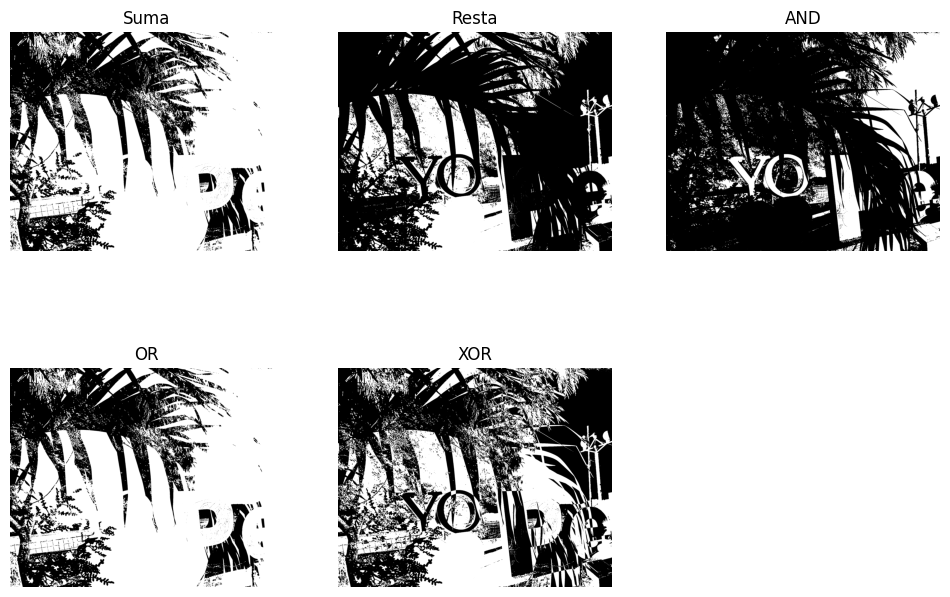

In [80]:
mostrar_imagenes([suma, resta, and_op, or_op, xor_op], 
                  ['Suma', 'Resta', 'AND', 'OR', 'XOR'])

# Problema #3:

### Librería para graficar en 3D

In [81]:
from mpl_toolkits.mplot3d import Axes3D

### Función para verla en 3D

In [82]:
def mostrar_imagen_3d(imagen_path):

    imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)
    
    filas, columnas = imagen.shape

    X, Y = np.meshgrid(range(columnas), range(filas))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot_surface(X, Y, imagen, cmap='gray')
    
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad Z')

    plt.show()

### Aplicación y resultado

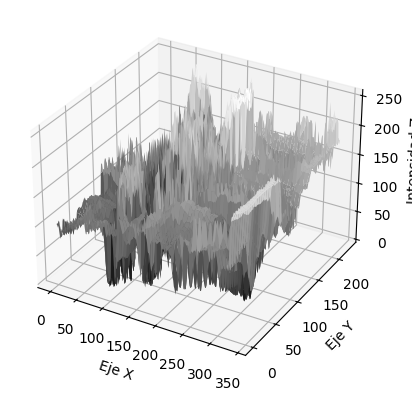

In [83]:
mostrar_imagen_3d('Perro.jpg')

# Problema #4:

### Función para transformación negativa

In [84]:
def transformacion_negativa(imagen):

    imagen_negativa = 255 - imagen
    return imagen_negativa

### Función para transformación lineal

In [85]:
def transformacion_lineal(imagen, alpha=1.0, beta=0):

    imagen_lineal = cv2.convertScaleAbs(imagen, alpha=alpha, beta=beta)
    return imagen_lineal

### Función para transformación logarítmica

In [86]:
def transformacion_logaritmica(imagen, c=1):

    imagen_float = imagen.astype(np.float32)
    imagen_log = c * np.log(1 + imagen_float)
    imagen_log = cv2.normalize(imagen_log, None, 0, 255, cv2.NORM_MINMAX)

    return imagen_log.astype(np.uint8)

### Función para transformación exponencial

In [87]:
def transformacion_exponencial(imagen, gamma=1.0, c=1.0):
 
    imagen_normalizada = imagen / 255.0
    imagen_exp = c * (imagen_normalizada ** gamma)
    imagen_exp = cv2.normalize(imagen_exp, None, 0, 255, cv2.NORM_MINMAX)
 
    return imagen_exp.astype(np.uint8)

### Imagen que se le aplicará las funciones

In [88]:
imagen = cv2.imread('Paisaje.jpg', cv2.IMREAD_GRAYSCALE)

### Aplicación de funciones

In [89]:
imagen_negativa = transformacion_negativa(imagen)
imagen_lineal = transformacion_lineal(imagen, alpha=1.2, beta=30)
imagen_logaritmica = transformacion_logaritmica(imagen, c=30)
imagen_exponencial = transformacion_exponencial(imagen, gamma=0.5, c=1.0)

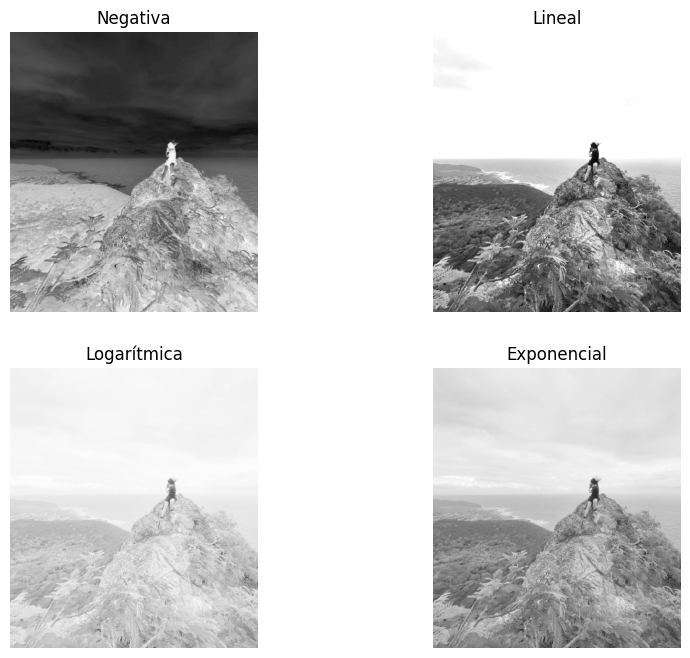

In [90]:
imagenes = [imagen_negativa, imagen_lineal, imagen_logaritmica, imagen_exponencial]
titulos = ['Negativa', 'Lineal', 'Logarítmica', 'Exponencial']

plt.figure(figsize=(10, 8))
for i, (img, titulo) in enumerate(zip(imagenes, titulos)):
    plt.subplot(2, 2,  i +1)
    plt.imshow(img, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
plt.show()

# Problema #5:

# Investigación sobre el Kernel Laplaciano y el Algoritmo de Canny para la Detección de Bordes en Imágenes

## Introducción

La detección de bordes es una técnica fundamental en el procesamiento de imágenes, utilizada para identificar las fronteras de los objetos dentro de una imagen. Dos enfoques comunes para la detección de bordes son el **kernel Laplaciano** y el **algoritmo de Canny**. Aunque ambos métodos tienen el mismo objetivo, difieren significativamente en su implementación y resultados.

## Kernel Laplaciano

### ¿Qué es el Kernel Laplaciano?

El kernel Laplaciano es un operador de segunda derivada utilizado en la detección de bordes. Se basa en la **transformada de Laplace**, que calcula la segunda derivada de una imagen. La idea principal es que los bordes en una imagen corresponden a áreas donde la intensidad de píxel cambia abruptamente, lo cual se refleja en las derivadas de la función de intensidad.

### Implementación en Python

En Python, el kernel Laplaciano se puede aplicar utilizando la biblioteca OpenCV:

```python
import cv2
import numpy as np

# Cargar la imagen en escala de grises
imagen = cv2.imread('imagen.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el kernel Laplaciano
laplaciano = cv2.Laplacian(imagen, cv2.CV_64F)

# Convertir la imagen a un formato visible
laplaciano = cv2.convertScaleAbs(laplaciano)

# Mostrar la imagen original y la imagen con el kernel Laplaciano aplicado
cv2.imshow('Original', imagen)
cv2.imshow('Laplaciano', laplaciano)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

## Características del Kernel Laplaciano

- **Simplicidad:** Es un enfoque sencillo que utiliza un filtro de convolución de segunda derivada para identificar bordes.
- **Independencia de la dirección:** A diferencia de otros operadores de detección de bordes, como Sobel o Prewitt, el kernel Laplaciano no es direccional y detecta bordes en todas las direcciones.
- **Detección de bordes múltiples:** Debido a que calcula la segunda derivada, el kernel Laplaciano tiende a resaltar múltiples bordes en áreas donde la intensidad cambia gradualmente.

## Limitaciones del Kernel Laplaciano

- **Sensibilidad al ruido:** El kernel Laplaciano es sensible al ruido, lo que puede resultar en la detección de bordes espurios. Esto se debe a que la segunda derivada amplifica las variaciones en la intensidad del píxel.
- **Ausencia de información direccional:** Al ser un operador isotrópico, no proporciona información sobre la orientación del borde.

## Algoritmo de Canny

### ¿Qué es el Algoritmo de Canny?

El algoritmo de Canny, propuesto por John F. Canny en 1986, es un método multi-etapa para la detección de bordes que busca optimizar la precisión en la detección y reducir al mínimo la detección de bordes falsos. Es conocido por su eficacia y robustez en la identificación de bordes significativos en una imagen.

### Implementación en Python

El algoritmo de Canny también se puede implementar fácilmente en Python con OpenCV:

```python
import cv2

# Cargar la imagen en escala de grises
imagen = cv2.imread('imagen.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el algoritmo de Canny
bordes_canny = cv2.Canny(imagen, 100, 200)

# Mostrar la imagen original y la imagen con el algoritmo de Canny aplicado
cv2.imshow('Original', imagen)
cv2.imshow('Bordes Canny', bordes_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

## Características del Algoritmo de Canny

- **Etapa de Suavizado:** Canny utiliza un filtro Gaussian para suavizar la imagen y reducir el ruido antes de la detección de bordes.
- **Detección de Bordes:** Aplica el operador de Sobel para encontrar las derivadas en las direcciones x e y, y luego calcula la magnitud del gradiente.
- **Supresión de No-Máximos:** Este paso suprime los píxeles que no representan un borde significativo.
- **Doble Umbral y Análisis de Conectividad:** Canny utiliza dos umbrales para identificar bordes fuertes y débiles, y luego realiza un seguimiento por histéresis para unir los bordes débiles a los fuertes si están conectados.

## Ventajas del Algoritmo de Canny

- **Robustez:** Canny es menos sensible al ruido debido a su etapa de suavizado inicial.
- **Precisión:** Ofrece una detección precisa de bordes, minimizando la detección de bordes falsos.
- **Orientación de Bordes:** Canny proporciona información sobre la orientación del borde, lo cual es útil para análisis de imágenes más avanzados.

## Limitaciones del Algoritmo de Canny

- **Complejidad Computacional:** Canny es más complejo computacionalmente que el kernel Laplaciano debido a sus múltiples etapas de procesamiento.
- **Dependencia de Parámetros:** La eficacia de Canny depende de la elección de los umbrales superior e inferior, lo que puede requerir ajuste manual.

## Comparación entre Kernel Laplaciano y Algoritmo de Canny

| Aspecto                   | Kernel Laplaciano                 | Algoritmo de Canny                                 |
|---------------------------|-----------------------------------|---------------------------------------------------|
| **Principio**             | Segunda derivada (Operador de Laplace) | Multi-etapa (Suavizado, Gradiente, Supresión de No-Máximos, Umbrales) |
| **Sensibilidad al Ruido** | Alta                              | Baja (debido al suavizado)                        |
| **Direccionalidad**       | No direccional                    | Direccional                                       |
| **Complejidad**           | Baja                              | Alta                                              |
| **Aplicabilidad**         | Adecuado para detección rápida y simple de bordes | Adecuado para detección de bordes precisa en imágenes complejas |

## Conclusión

Tanto el kernel Laplaciano como el algoritmo de Canny son métodos efectivos para la detección de bordes en imágenes, pero cada uno tiene sus ventajas y limitaciones. El kernel Laplaciano es simple y rápido, pero sensible al ruido, mientras que Canny es más robusto y preciso, aunque más complejo y dependiente de parámetros. La elección entre uno u otro depende del contexto y de los requisitos específicos de la aplicación en cuestión.

## Bibliografía

- Canny, J. F. (1986). A Computational Approach to Edge Detection. IEEE Transactions on Pattern Analysis and Machine Intelligence, 8(6), 679-698.
- Gonzalez, R. C., & Woods, R. E. (2002). Digital Image Processing. Prentice Hall.
- OpenCV Documentation. (2024). Image Processing. Disponible en: [https://docs.opencv.org](https://docs.opencv.org)
- Pratt, W. K. (2007). Digital Image Processing: PIKS Scientific Inside. John Wiley & Sons.

